In [168]:
import Augmentor
from tqdm import tnrange, tqdm_notebook
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt  
from numpy import moveaxis
chicken_path  = "raw_images/chicken/"
pig_path = "raw_images/pig/"
panda_path = "raw_images/panda/"
terrain_path = "raw_images/terrain/"

In [171]:
def augment_images(source_folder, num_images):
    p = Augmentor.Pipeline(source_folder)
    p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
    p.zoom(probability=0.5, min_factor=1.1, max_factor=1.3)

    p.random_distortion(probability=0.5, grid_width=3, grid_height=3, magnitude=4)
    p.flip_left_right(probability=0.7)
    p.resize(probability=1.0, width=50, height=50)

    p.sample(num_images)

In [172]:
augment_images(chicken_path, 500)
augment_images(pig_path, 500)
augment_images(panda_path, 500)
augment_images(terrain_path, 500)


Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7ADD0AEB8>:   1%|          | 5/500 [00:00<00:19, 25.96 Samples/s]

Initialised with 25 image(s) found.
Output directory set to raw_images/chicken/output.

Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7ADF0CDD8>: 100%|██████████| 500/500 [00:02<00:00, 236.24 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7ADC49160>:   1%|          | 3/500 [00:00<00:59,  8.33 Samples/s]

Initialised with 23 image(s) found.
Output directory set to raw_images/pig/output.

Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7ADBB8588>: 100%|██████████| 500/500 [00:02<00:00, 202.05 Samples/s]
Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7ADB3A668>:   0%|          | 1/500 [00:00<01:27,  5.70 Samples/s]

Initialised with 29 image(s) found.
Output directory set to raw_images/panda/output.

Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7AE04C400>: 100%|██████████| 500/500 [00:03<00:00, 164.32 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 29 image(s) found.
Output directory set to raw_images/terrain/output.

Processing <PIL.Image.Image image mode=RGBA size=50x50 at 0x7FD7AE04C978>: 100%|██████████| 500/500 [00:05<00:00, 94.99 Samples/s]


In [173]:
def img_to_arr(im_path, move_axis = True):
    try:
        x = cv2.imread(im_path) 
        x = cv2.cvtColor(x, cv2.COLOR_BGR2RGB)

    except:
        return
    # x = np.array(img)
    if move_axis == True:
        x = moveaxis(x, 2, 0)
#     x = x.astype(float)
    return x
def generate_train_data(source_folder, save_path, filename,  label = 0):
    save_path = save_path + filename
    final_stack = []
    c = 0
    for i in tqdm_notebook(os.listdir(source_folder)):   
        
        im_path = source_folder + "/" + i
        im_arr = img_to_arr(im_path, move_axis = True)
        stack_element = [im_arr, label]
        stack_element = np.array(stack_element)
        final_stack.append(stack_element)

    final_stack = np.array(final_stack)
    fmt_name = save_path
    np.save(fmt_name, final_stack)
    print ("saved -- ", fmt_name)
    
def view_samples_from_training_data(arr, skip_val):
    images = []
    for i in range (0,len(arr), skip_val):
        foo = np.moveaxis(arr[i][0], 0, 2)
        images.append(foo)
    f = plt.figure(figsize = (20,20))
    for m in range (1,len(images)):
        f.add_subplot(1,len(images), m)
        plt.imshow(images[m])
    plt.show()

In [174]:
generate_train_data(source_folder = chicken_path + "output/", save_path = "numpy/", filename = "chicken.npy", label = 0)

generate_train_data(source_folder = pig_path + "output/", save_path = "numpy/", filename = "pig.npy", label = 1)

generate_train_data(source_folder = panda_path + "output/", save_path = "numpy/", filename = "panda.npy", label = 2)

generate_train_data(source_folder = terrain_path + "output/", save_path = "numpy/", filename = "terrain.npy", label = 3)


saved --  numpy/chicken.npy



saved --  numpy/pig.npy



saved --  numpy/panda.npy



saved --  numpy/terrain.npy


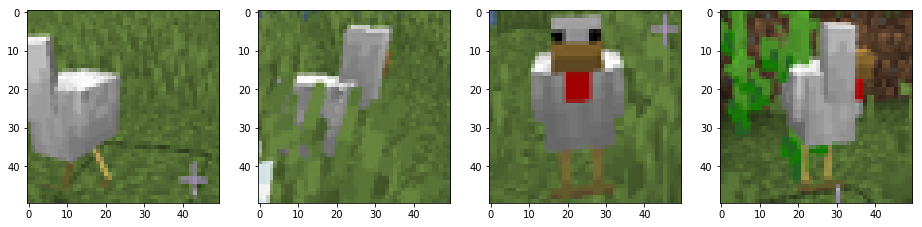

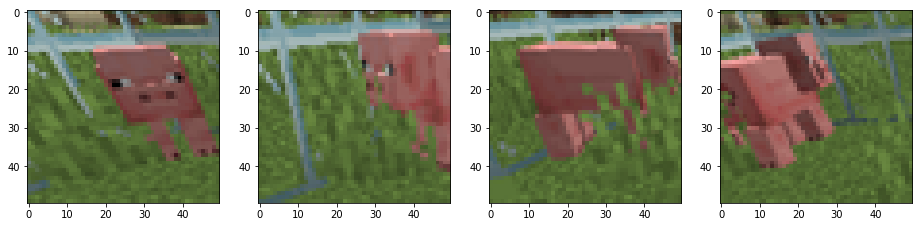

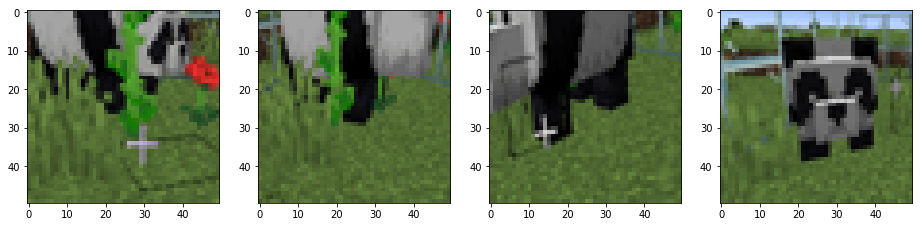

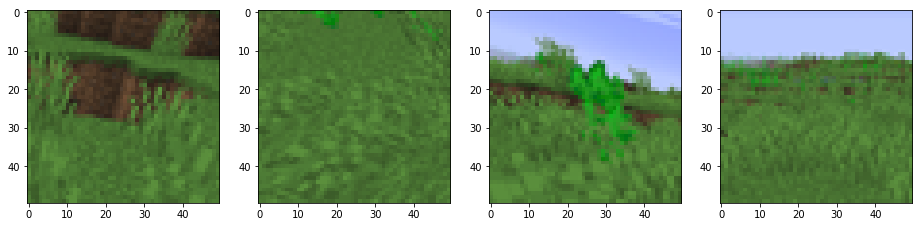

In [176]:
chickens = np.array(np.load("numpy/chicken.npy", allow_pickle = True))
pigs = np.array(np.load("numpy/pig.npy", allow_pickle = True))
panda_bois = np.array(np.load("numpy/panda.npy", allow_pickle = True))
terrain = np.array(np.load("numpy/terrain.npy", allow_pickle = True))


view_samples_from_training_data(chickens, skip_val= 100)
view_samples_from_training_data(pigs, skip_val= 100)
view_samples_from_training_data(panda_bois, skip_val= 100)
view_samples_from_training_data(terrain, skip_val= 100)
